/var/folders/bs/1pz_7c010971948x29m_ls3h0000gn/T/ipykernel_48691/1909509310.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(app_names, rotation=45, ha='right', fontsize=10)


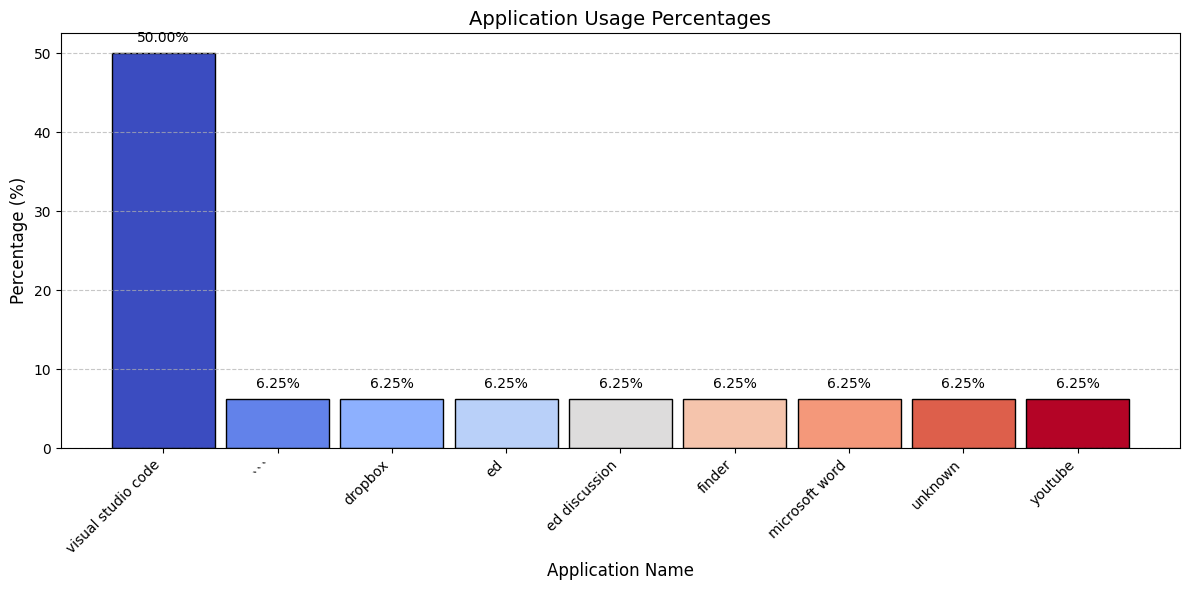

In [5]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

def get_app_percentages():
    db_path = '/Users/sanketsushantpai/Desktop/FocaFounderHack/Foca.ai/database/database.db'
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    query = '''
    WITH app_counts AS (
        SELECT
            app_name,
            COUNT(*) AS count
        FROM
            modified_productivity_data
        GROUP BY
            app_name
    ),
    total_count AS (
        SELECT
            COUNT(*) AS total
        FROM
            modified_productivity_data
    )
    SELECT
        app_name,
        count,
        (count * 100.0 / total) AS percentage
    FROM
        app_counts,
        total_count
    ORDER BY
        percentage DESC;
    '''

    cursor.execute(query)
    results = cursor.fetchall()

    conn.close()
    return results

def plot_app_percentages(percentages):
    # Extract data for plotting
    app_names = [row[0] for row in percentages]
    percentages = [row[2] for row in percentages]

    # Generate a more user-friendly color palette
    num_bars = len(app_names)
    colors = plt.cm.coolwarm(np.linspace(0, 1, num_bars))

    # Create a bar chart with no gaps between bars
    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(app_names, percentages, color=colors, edgecolor='black', width=0.9)

    # Add labels and title
    ax.set_xlabel('Application Name', fontsize=12)
    ax.set_ylabel('Percentage (%)', fontsize=12)
    ax.set_title('Application Usage Percentages', fontsize=14)
    ax.set_xticklabels(app_names, rotation=45, ha='right', fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value labels on top of bars
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

# Get app percentages and plot
percentages = get_app_percentages()
plot_app_percentages(percentages)

import sqlite3
import matplotlib.pyplot as plt




In [8]:
import sqlite3

def print_productivity_data():
    db_path = '/Users/sanketsushantpai/Desktop/FocaFounderHack/Foca.ai/database/database.db'
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Query to select user_is_productive values and their counts
    query = '''
    SELECT
        user_is_productive,
        COUNT(*) AS count
    FROM
        modified_productivity_data
    GROUP BY
        user_is_productive;
    '''

    cursor.execute(query)
    results = cursor.fetchall()

    conn.close()
    
    # Print the results
    for row in results:
        print(f"Productive: {row[0]}, Count: {row[1]}")

# Run the function to print the data
print_productivity_data()


Productive: browser, Count: 1
Productive: false, Count: 5
Productive: true, Count: 10


Productive: browser, Count: 1
Productive: false, Count: 5
Productive: true, Count: 10


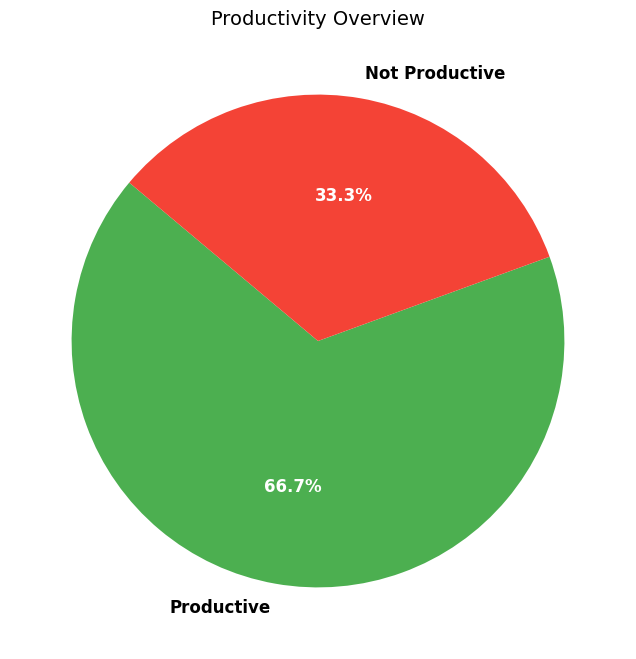

In [11]:
import sqlite3
import matplotlib.pyplot as plt

def get_productivity_data():
    db_path = '/Users/sanketsushantpai/Desktop/FocaFounderHack/Foca.ai/database/database.db'
    conn = sqlite3.connect(db_path)
    cursor = conn.cursor()

    # Query to count the number of productive and non-productive entries
    query = '''
    SELECT
        user_is_productive,
        COUNT(*) AS count
    FROM
        modified_productivity_data
    GROUP BY
        user_is_productive;
    '''

    cursor.execute(query)
    results = cursor.fetchall()

    conn.close()
    return results

def plot_productivity_data(data):
    # Initialize labels and sizes
    labels = ['Productive', 'Not Productive']
    sizes = [0, 0]  # Start with zeros for each category

    # Map counts to the appropriate labels
    for row in data:
        if row[0] == 'true':  # Assuming 'true' is stored as a string
            sizes[0] = row[1]
        elif row[0] == 'false':  # Assuming 'false' is stored as a string
            sizes[1] = row[1]

    # Plot pie chart
    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        autopct='%1.1f%%',
        startangle=140,
        colors=['#4CAF50', '#F44336']  
    )

    # Beautify the plot
    plt.title('Productivity Overview', fontsize=14)
    plt.setp(autotexts, size=12, weight='bold', color='white')
    plt.setp(texts, size=12, weight='bold')

    plt.show()

# Fetch data and plot
productivity_data = get_productivity_data()
for row in productivity_data:
    print(f"Productive: {row[0]}, Count: {row[1]}")  

plot_productivity_data(productivity_data)
